In [1]:
import pandas as pd

datasets = {
    "patients": pd.read_csv("patients.csv"),
    "ADMISSIONS": pd.read_csv("ADMISSIONS.csv"),
    "ICUSTAYS": pd.read_csv("ICUSTAYS.csv"),
    "CHARTEVENTS": pd.read_csv("CHARTEVENTS.csv"),
    "LABEVENTS": pd.read_csv("LABEVENTS.csv"),
    "PRESCRIPTIONS": pd.read_csv("PRESCRIPTIONS.csv"),
    "DIAGNOSES_ICD": pd.read_csv("DIAGNOSES_ICD.csv"),
    "NOTEEVENTS": pd.read_csv("NOTEEVENTS.csv"),
    "CPTEVENTS": pd.read_csv("CPTEVENTS.csv"),
    "OUTPUTEVENTS": pd.read_csv("OUTPUTEVENTS.csv"),
}

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/3700576556.py:7: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  "CHARTEVENTS": pd.read_csv("CHARTEVENTS.csv"),
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/3700576556.py:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  "PRESCRIPTIONS": pd.read_csv("PRESCRIPTIONS.csv"),
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/3700576556.py:12: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  "CPTEVENTS": pd.read_csv("CPTEVENTS.csv"),


In [2]:
# Dataset Information

def display_dataset_info(df, name):
    print(f"\n {name} Dataset")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("-" * 50)
    
for name, df in datasets.items():  # Looping through each dataset and display info
    display_dataset_info(df, name)


 patients Dataset
Shape: (10000, 8)

First 5 rows:
   ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0       1           2      M  2138-07-17 00:00:00                  NaN   
1       2           3      M  2025-04-11 00:00:00  2102-06-14 00:00:00   
2       3           4      F  2143-05-12 00:00:00                  NaN   
3       4           5      M  2103-02-02 00:00:00                  NaN   
4       5           6      F  2109-06-21 00:00:00                  NaN   

  DOD_HOSP              DOD_SSN  EXPIRE_FLAG  
0      NaN                  NaN            0  
1      NaN  2102-06-14 00:00:00            1  
2      NaN                  NaN            0  
3      NaN                  NaN            0  
4      NaN                  NaN            0  

Missing Values:
ROW_ID            0
SUBJECT_ID        0
GENDER            0
DOB               0
DOD            6239
DOD_HOSP       7808
DOD_SSN        6562
EXPIRE_FLAG       0
dtype: int64
-------------------------------

ROW_ID                    0
SUBJECT_ID                0
HADM_ID                   0
ICUSTAY_ID           362704
STARTDATE               151
ENDDATE                 746
DRUG_TYPE                 0
DRUG                      0
DRUG_NAME_POE        400579
DRUG_NAME_GENERIC    399697
FORMULARY_DRUG_CD       507
GSN                  112739
NDC                    1397
PROD_STRENGTH           163
DOSE_VAL_RX             156
DOSE_UNIT_RX            153
FORM_VAL_DISP           159
FORM_UNIT_DISP          187
ROUTE                   110
dtype: int64
--------------------------------------------------

 DIAGNOSES_ICD Dataset
Shape: (118300, 5)

First 5 rows:
   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0       1           2   163353      1.0     V3001
1       2           2   163353      2.0      V053
2       3           2   163353      3.0      V290
3      12           3   145834      9.0      2639
4      10           3   145834      7.0      6826

Missing Values:
ROW_ID         0
SUBJECT_ID  

In [3]:
# Data Cleaning
patients = datasets["patients"]

# Converting datetime columns
patients['DOB'] = pd.to_datetime(patients['DOB'])
patients['DOD'] = pd.to_datetime(patients['DOD'], errors='coerce')
patients['DOD_HOSP'] = pd.to_datetime(patients['DOD_HOSP'], errors='coerce')
patients['DOD_SSN'] = pd.to_datetime(patients['DOD_SSN'], errors='coerce')

# Filling missing values
patients['DOD_HOSP'] = patients['DOD_HOSP'].fillna("Alive")
patients['DOD_SSN'] = patients['DOD_SSN'].fillna("Alive")


In [4]:
# ADMISSIONS.csv

admissions = datasets["ADMISSIONS"]

# Convert datetime columns
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'])
admissions['DEATHTIME'] = pd.to_datetime(admissions['DEATHTIME'], errors='coerce')

# Fill missing values
admissions['LANGUAGE'] = admissions['LANGUAGE'].fillna("Unknown")
admissions['MARITAL_STATUS'] = admissions['MARITAL_STATUS'].fillna("Unknown")
admissions['EDREGTIME'] = pd.to_datetime(admissions['EDREGTIME'], errors='coerce')
admissions['EDOUTTIME'] = pd.to_datetime(admissions['EDOUTTIME'], errors='coerce')

In [5]:
icustays = datasets["ICUSTAYS"]

# Convert datetime columns
icustays['INTIME'] = pd.to_datetime(icustays['INTIME'])
icustays['OUTTIME'] = pd.to_datetime(icustays['OUTTIME'])

In [6]:
#CHARTEVENTS.csv
chartevents = datasets["CHARTEVENTS"]

# Converting datetime columns
chartevents['charttime'] = pd.to_datetime(chartevents['charttime'])
chartevents['storetime'] = pd.to_datetime(chartevents['storetime'], errors='coerce')
chartevents = chartevents.dropna(subset=['valuenum'])
chartevents = chartevents.drop(columns=['warning', 'error', 'resultstatus', 'stopped'])

In [7]:
#LABEVENTS.csv
labevents = datasets["LABEVENTS"]
labevents = labevents.dropna(subset=['HADM_ID']) # Drop rows with missing vals
labevents['CHARTTIME'] = pd.to_datetime(labevents['CHARTTIME'])
labevents = labevents.dropna(subset=['VALUENUM'])
labevents = labevents.drop(columns=['VALUEUOM', 'FLAG'])

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/1670203922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labevents['CHARTTIME'] = pd.to_datetime(labevents['CHARTTIME'])


In [8]:
print("Available columns in LABEVENTS:", labevents.columns)
columns_to_drop = ['VALUEUNOM', 'flag']
existing_columns = [col for col in columns_to_drop if col in labevents.columns]
labevents = labevents.drop(columns=existing_columns)

Available columns in LABEVENTS: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ITEMID', 'CHARTTIME', 'VALUE',
       'VALUENUM'],
      dtype='object')


In [9]:
columns_to_drop = ['VALUEUOM', 'FLAG'] # Dropping columns using correct names
existing_columns = [col for col in columns_to_drop if col in labevents.columns]
labevents = labevents.drop(columns=existing_columns)

In [10]:
patients.to_csv('PATIENTS_cleaned.csv', index=False)
admissions.to_csv('ADMISSIONS_cleaned.csv', index=False)
icustays.to_csv('ICUSTAYS_cleaned.csv', index=False)
chartevents.to_csv('CHARTEVENTS_cleaned.csv', index=False)
labevents.to_csv('LABEVENTS_cleaned.csv', index=False)

In [11]:
merged_data = pd.merge(patients, admissions, on='SUBJECT_ID', how='inner')
merged_data = pd.merge(merged_data, icustays, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
merged_data.to_csv('MERGED_DATA.csv', index=False)

In [12]:
merged_data['AGE'] = (merged_data['ADMITTIME'].dt.year - merged_data['DOB'].dt.year)
merged_data['LOS_DAYS'] = (merged_data['DISCHTIME'] - merged_data['ADMITTIME']).dt.days
merged_data['ADMIT_HOUR'] = merged_data['ADMITTIME'].dt.hour
merged_data['ADMIT_DAYOFWEEK'] = merged_data['ADMITTIME'].dt.day_name()
merged_data.to_csv('MERGED_DATA_cleaned_final.csv', index=False)

In [13]:
def check_null_values(df, name):
    print(f"\n===== Null Values in {name} =====")
    print(df.isnull().sum())


patients_cleaned = pd.read_csv('PATIENTS_cleaned.csv')
admissions_cleaned = pd.read_csv('ADMISSIONS_cleaned.csv')
icustays_cleaned = pd.read_csv('ICUSTAYS_cleaned.csv')
chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned.csv')
labevents_cleaned = pd.read_csv('LABEVENTS_cleaned.csv')
merged_data = pd.read_csv('MERGED_DATA_cleaned_final.csv')


check_null_values(patients_cleaned, "PATIENTS")
check_null_values(admissions_cleaned, "ADMISSIONS")
check_null_values(icustays_cleaned, "ICUSTAYS")
check_null_values(chartevents_cleaned, "CHARTEVENTS")
check_null_values(labevents_cleaned, "LABEVENTS")
check_null_values(merged_data, "MERGED_DATA")

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/1927064154.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned.csv')



===== Null Values in PATIENTS =====
ROW_ID            0
SUBJECT_ID        0
GENDER            0
DOB               0
DOD            6239
DOD_HOSP          0
DOD_SSN           0
EXPIRE_FLAG       0
dtype: int64

===== Null Values in ADMISSIONS =====
ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               11624
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                    0
RELIGION                  183
MARITAL_STATUS              0
ETHNICITY                   0
EDREGTIME                6979
EDOUTTIME                6979
DIAGNOSIS                   8
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

===== Null Values in ICUSTAYS =====
ROW_ID            0
SUBJECT_ID        0
HADM_ID           0
ICUSTAY_ID        0
DBSOURCE          0
FIRST_CAREUNIT    0
LAST_CAREUN

In [14]:
admissions['DEATHTIME'] = admissions['DEATHTIME'].fillna("Alive")
admissions['RELIGION'] = admissions['RELIGION'].fillna("Unknown")
admissions = admissions.dropna(subset=['EDREGTIME', 'EDOUTTIME'])
admissions.to_csv('ADMISSIONS_cleaned_final.csv', index=False)
chartevents = chartevents.dropna(subset=['icustay_id'])
chartevents = chartevents.dropna(subset=['value'])
chartevents.to_csv('CHARTEVENTS_cleaned_final.csv', index=False)
merged_data['DEATHTIME'] = merged_data['DEATHTIME'].fillna("Alive")
merged_data['RELIGION'] = merged_data['RELIGION'].fillna("Unknown")
merged_data = merged_data.dropna(subset=['EDREGTIME', 'EDOUTTIME'])
merged_data.to_csv('MERGED_DATA_cleaned_final.csv', index=False)

In [15]:
def check_null_values(df, name):
    print(f"\n===== Null Values in {name} =====")
    print(df.isnull().sum())

admissions_cleaned = pd.read_csv('ADMISSIONS_cleaned_final.csv')
chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned_final.csv')
merged_data = pd.read_csv('MERGED_DATA_cleaned_final.csv')

check_null_values(admissions_cleaned, "ADMISSIONS")
check_null_values(chartevents_cleaned, "CHARTEVENTS")
check_null_values(merged_data, "MERGED_DATA")


===== Null Values in ADMISSIONS =====
ROW_ID                  0
SUBJECT_ID              0
HADM_ID                 0
ADMITTIME               0
DISCHTIME               0
DEATHTIME               0
ADMISSION_TYPE          0
ADMISSION_LOCATION      0
DISCHARGE_LOCATION      0
INSURANCE               0
LANGUAGE                0
RELIGION                0
MARITAL_STATUS          0
ETHNICITY               0
EDREGTIME               0
EDOUTTIME               0
DIAGNOSIS               0
HOSPITAL_EXPIRE_FLAG    0
HAS_CHARTEVENTS_DATA    0
dtype: int64

===== Null Values in CHARTEVENTS =====
row_id            0
subject_id        0
hadm_id           0
icustay_id        0
itemid            0
charttime         0
storetime         0
cgid              0
value             0
valuenum          0
valueuom      83411
dtype: int64

===== Null Values in MERGED_DATA =====
ROW_ID_x                   0
SUBJECT_ID                 0
GENDER                     0
DOB                        0
DOD                     2

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/2672795853.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned_final.csv')


In [16]:
merged_data = pd.merge(patients, admissions, on='SUBJECT_ID', how='inner')
merged_data = pd.merge(merged_data, icustays, on=['SUBJECT_ID', 'HADM_ID'], how='inner')


merged_data['AGE'] = (merged_data['ADMITTIME'].dt.year - merged_data['DOB'].dt.year)
merged_data['LOS_DAYS'] = (merged_data['DISCHTIME'] - merged_data['ADMITTIME']).dt.days
merged_data['ADMIT_HOUR'] = merged_data['ADMITTIME'].dt.hour
merged_data['ADMIT_DAYOFWEEK'] = merged_data['ADMITTIME'].dt.day_name()


patients.to_csv("PATIENTS_cleaned.csv", index=False)
admissions.to_csv("ADMISSIONS_cleaned.csv", index=False)
icustays.to_csv("ICUSTAYS_cleaned.csv", index=False)
chartevents.to_csv("CHARTEVENTS_cleaned.csv", index=False)
labevents.to_csv("LABEVENTS_cleaned.csv", index=False)


merged_data.to_csv("MERGED_DATA_cleaned_final.csv", index=False)


In [17]:
import pandas as pd

file_path = "MERGED_DATA_cleaned_final.csv"
merged_data = pd.read_csv(file_path)

datetime_cols = ["DOD", "DEATHTIME", "OUTTIME", "ADMITTIME", "DISCHTIME", "EDREGTIME", "EDOUTTIME"]
for col in datetime_cols:
    merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')


merged_data['DOD'].fillna("Alive", inplace=True)
merged_data['DEATHTIME'].fillna("Alive", inplace=True)


merged_data['OUTTIME'].fillna(merged_data['OUTTIME'].median(), inplace=True)
merged_data['LOS'].fillna(merged_data['LOS'].median(), inplace=True)

cleaned_file_path = "MERGED_DATA_cleaned_final.csv"
merged_data.to_csv(cleaned_file_path, index=False)

print(merged_data.isnull().sum())

ROW_ID_x                0
SUBJECT_ID              0
GENDER                  0
DOB                     0
DOD                     0
DOD_HOSP                0
DOD_SSN                 0
EXPIRE_FLAG             0
ROW_ID_y                0
HADM_ID                 0
ADMITTIME               0
DISCHTIME               0
DEATHTIME               0
ADMISSION_TYPE          0
ADMISSION_LOCATION      0
DISCHARGE_LOCATION      0
INSURANCE               0
LANGUAGE                0
RELIGION                0
MARITAL_STATUS          0
ETHNICITY               0
EDREGTIME               0
EDOUTTIME               0
DIAGNOSIS               0
HOSPITAL_EXPIRE_FLAG    0
HAS_CHARTEVENTS_DATA    0
ROW_ID                  0
ICUSTAY_ID              0
DBSOURCE                0
FIRST_CAREUNIT          0
LAST_CAREUNIT           0
FIRST_WARDID            0
LAST_WARDID             0
INTIME                  0
OUTTIME                 0
LOS                     0
AGE                     0
LOS_DAYS                0
ADMIT_HOUR  

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/370698603.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/370698603.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Alive' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  merged_data['DOD'].fillna("Alive", inplace=True)
/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/370698603.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Alive' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  merge

# Age Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


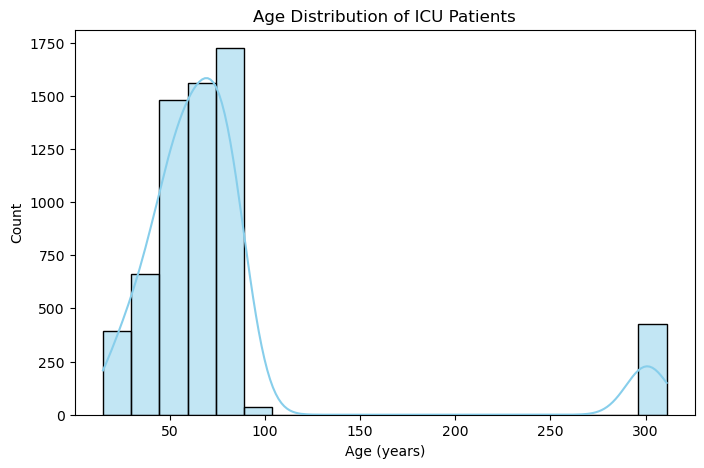

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(merged_data['AGE'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of ICU Patients')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


# Gender Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


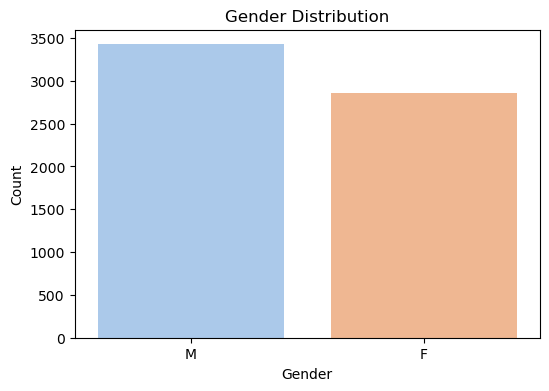

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=merged_data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Mortality

Mortality Rate: 15.70%


/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


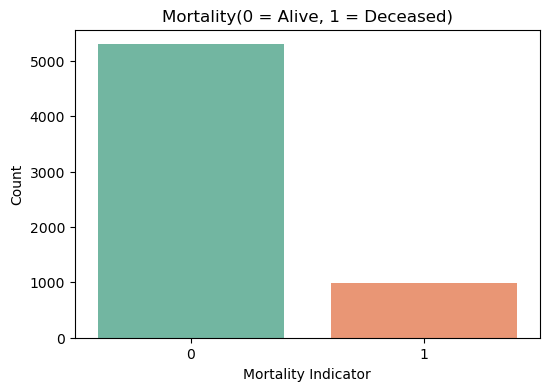

In [20]:
mortality_rate = merged_data['HOSPITAL_EXPIRE_FLAG'].mean() * 100
print(f"Mortality Rate: {mortality_rate:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='HOSPITAL_EXPIRE_FLAG', data=merged_data, palette='Set2')
plt.title('Mortality(0 = Alive, 1 = Deceased)')
plt.xlabel('Mortality Indicator')
plt.ylabel('Count')
plt.show()

In [21]:
# Calculate Mortality Rate
mortality_rate = merged_data['HOSPITAL_EXPIRE_FLAG'].mean() * 100
print(f"Mortality Rate: {mortality_rate:.2f}%")


Mortality Rate: 15.70%


# Ethicity Distribution 

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


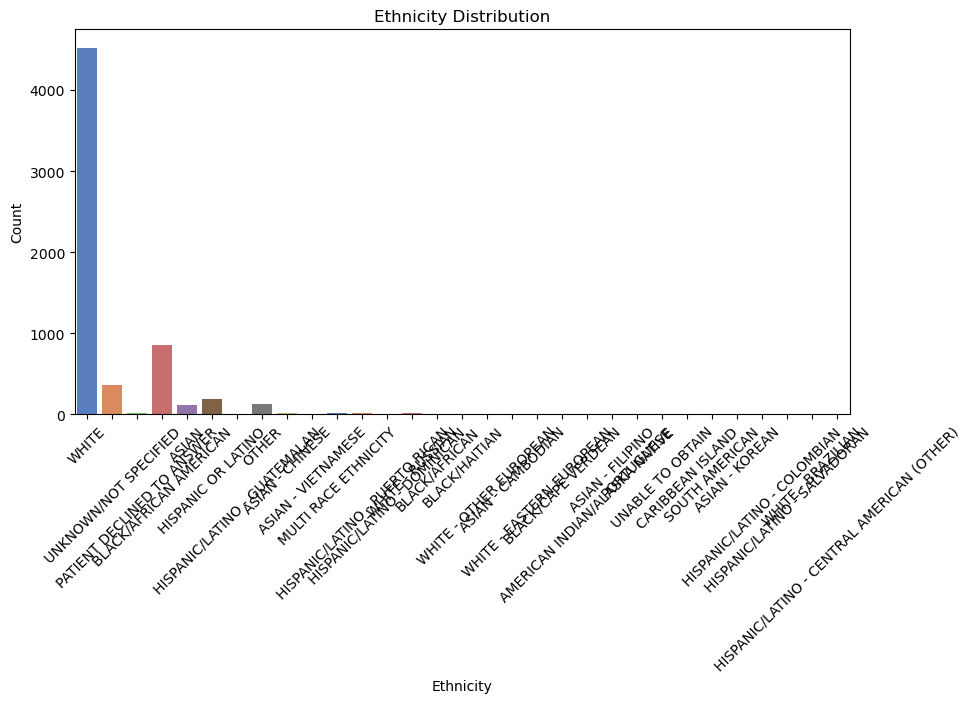

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='ETHNICITY', data=merged_data, palette='muted')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Length of stay

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


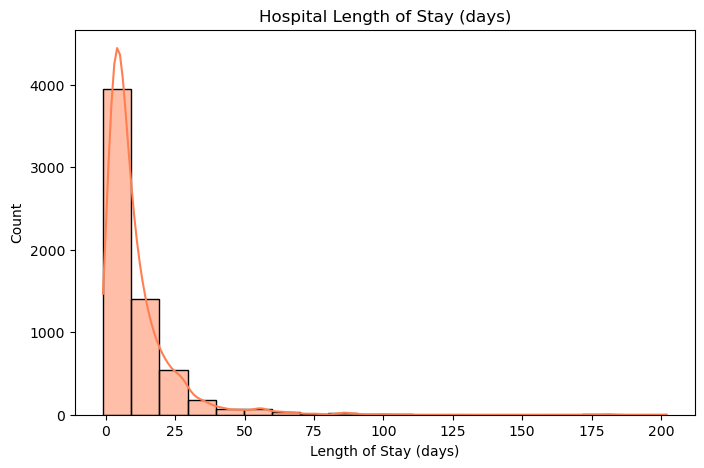

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['LOS_DAYS'], kde=True, bins=20, color='coral')
plt.title('Hospital Length of Stay (days)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.show()

# Admission Hour and Day of Week

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


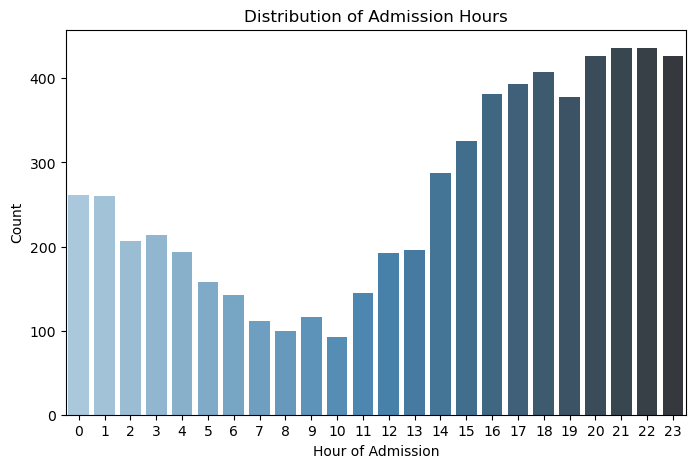

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


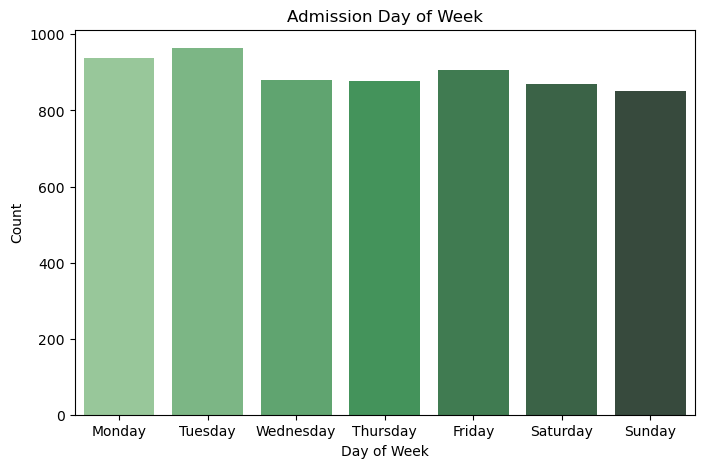

In [24]:
# Admission Hour Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='ADMIT_HOUR', data=merged_data, palette='Blues_d')
plt.title('Distribution of Admission Hours')
plt.xlabel('Hour of Admission')
plt.ylabel('Count')
plt.show()

# Day of Week Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='ADMIT_DAYOFWEEK', data=merged_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Greens_d')
plt.title('Admission Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap

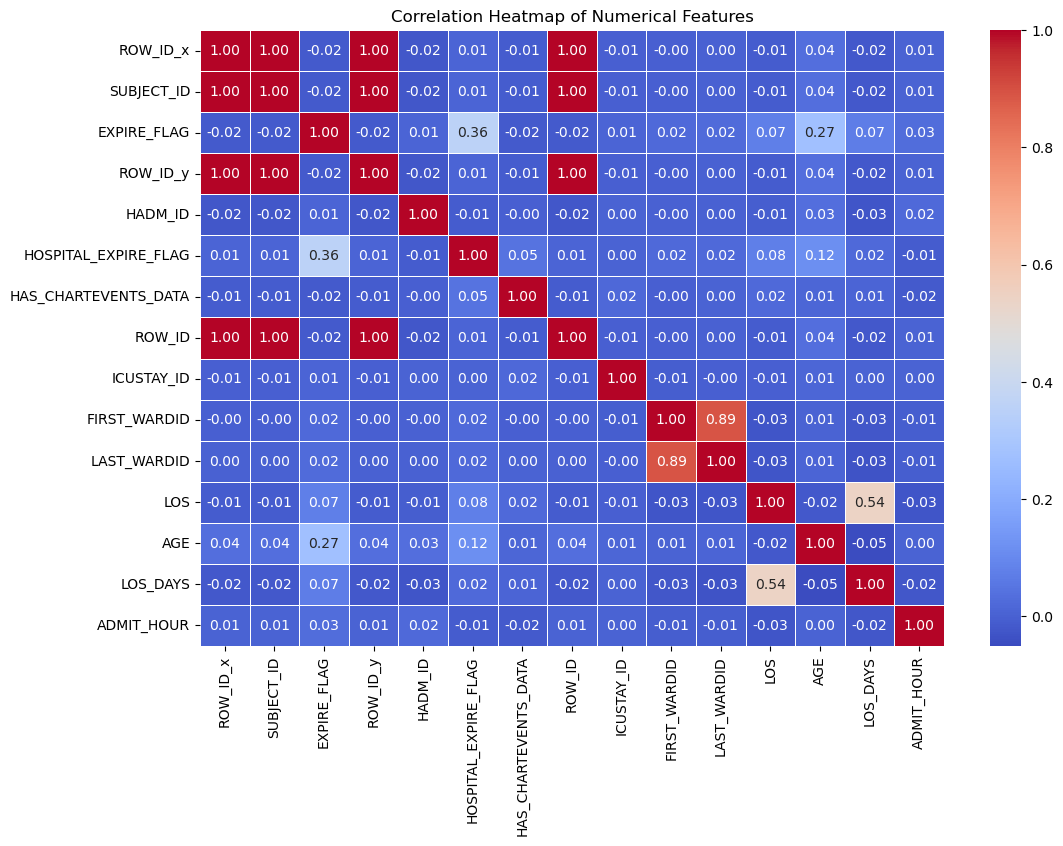

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_data = pd.read_csv("MERGED_DATA_cleaned_final.csv")
numerical_features = merged_data.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Scatter Plot: Age vs. Length of Stay

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

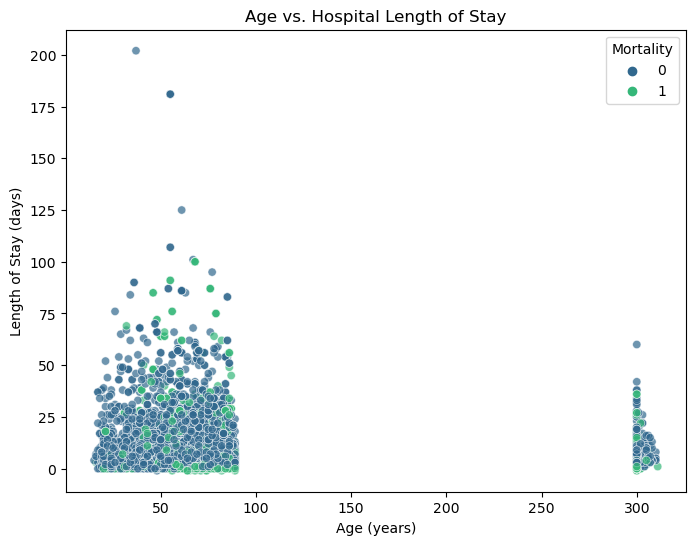

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='LOS_DAYS', hue='HOSPITAL_EXPIRE_FLAG', data=merged_data, palette='viridis', alpha=0.7)
plt.title('Age vs. Hospital Length of Stay')
plt.xlabel('Age (years)')
plt.ylabel('Length of Stay (days)')
plt.legend(title='Mortality')
plt.show()


# Heart Rate Time series

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/648850914.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv('CHARTEVENTS_cleaned_final.csv', parse_dates=['charttime', 'storetime'])


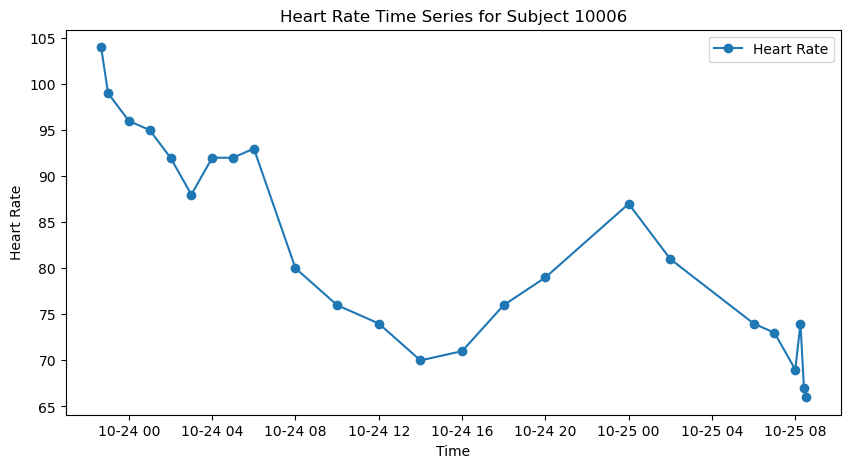

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chartevents = pd.read_csv('CHARTEVENTS_cleaned_final.csv', parse_dates=['charttime', 'storetime'])
sample_subject = 10006 
heart_rate_itemid = 211 

heart_rate_data = chartevents[
    (chartevents['subject_id'] == sample_subject) &
    (chartevents['itemid'] == heart_rate_itemid)
]


plt.figure(figsize=(10, 5))
plt.plot(heart_rate_data['charttime'], heart_rate_data['valuenum'], marker='o', linestyle='-', label='Heart Rate')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title(f'Heart Rate Time Series for Subject {sample_subject}')
plt.legend()
plt.show()

# Top 10 prescribed Drugs

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_15608/3924574745.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version

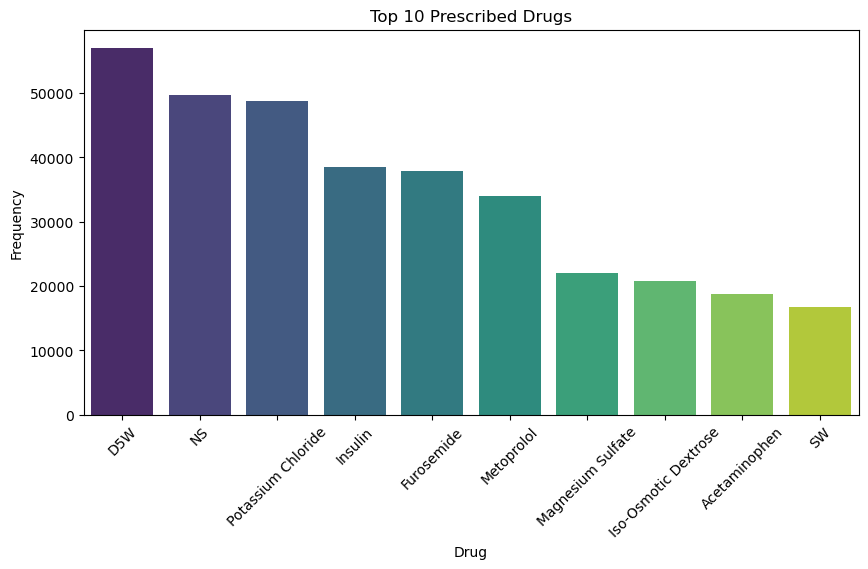

In [28]:

prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
drug_counts = prescriptions['DRUG'].value_counts().head(10) #frequency of prescribed drugs using the 'drug' column


plt.figure(figsize=(10, 5))
sns.barplot(x=drug_counts.index, y=drug_counts.values, palette='viridis')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.title('Top 10 Prescribed Drugs')
plt.xticks(rotation=45)
plt.show()